#Lagrange interpolation

####Lagrange polynomial

Given a set of distinct $n\,+\,1$ data points in $\mathbb{R}^{2}\,(x_0,\,y_0),\,(x_1,\,y_1)\dots(x_n,\,y_n)$ we can define their *Lagrange polynomial interpolator* as:
<br>
<br>
\begin{equation}
  P\,(x)
  \,=\,\sum_{i\,=\,0}^{n} a_i\,b_i\,(x),
\end{equation}
<br>
<br>
where
<br>
<br>
\begin{equation}
  b_{i}\,(x)
  \,=\,\prod_{j\,=\,0\\j\,\ne\,i}^{n} \frac{x\,-\,x_j}{x_i\,-\,x_j}
  \,=\,\frac{x\,-\,x_0}{x_i\,-\,x_0} \frac{x\,-\,x_1}{x_i\,-\,x_1}\dots\frac{x\,-\,x_n}{x_i\,-\,x_n}
\end{equation}


**START THE LAB** \\
Task 1: Import the libraries: numpy as np, scipy, time and matplotlib.pyplot as plt

In [46]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import time

Task 2: Below are the user-defined functions to create Lagrange basis and perform Lagrange interpolations. You do not need to change these functions. **You are going to use scipy's Lagrange Interpolation function to perform the same interpolation task**.


In [47]:
def lagrange (x, xn):
  """
  Creates the Lagrange basis functions
  """
  N = x.size # query points at which we interpolate the function
  n = xn.size # data points used to build the basis functions and interpolation

  B = np.ones ((n, N)) # basis functions

  for i in range (n):

    for j in range (n):

      if i != j:

        B[i] *= (x - xn[j]) / (xn[i] - xn[j])

  return B


def lagInt1D (x, xn, yn):
  """
  Interpolates a 1D set of points
  using Lagrange polynomials
  """
  N = x.size # query points at which the function is interpolated
  n = xn.size # data points used to build the basis functions and interpolation

  B = lagrange (x, xn)

  y = np.zeros (N)

  for i in range (n):

    y += yn[i] * B[i]

  return y

# **YOU ARE GOING TO ADD NEW CODES BELOW**

In [48]:
if __name__ == "__main__":
  '''
  The main function starts here
  '''

  # This is a 1D data. The function values (yn) are found at the data points (xn)
  # Using this data, you are going to build the Lagrange interpolation
  xn = np.array ([-2.0,-1.0,0.,1.,2.])
  yn = 0.1*xn**5 + 10*xn**4 + 100*xn**3 + 200*xn + 100

  N = 1000 # interpolate the function at equispaced 1000 points
  x = np.linspace (-2, 2.0, N) # the query points

  # DO NOT CHANGE THIS BLOCK
  # Build the basis functions and perform interpolation using the user-defined functions
  # Also time the functions
  startUser = time.time()
  P = lagInt1D (x, xn, yn) # this is the interpolated values at 1000 points
  endUser = time.time()
  timeUser = endUser - startUser

  print(['Time it takes to build interpolation with the user-defined function:', timeUser])

  # ADD SOMETHING TO THIS BLOCK
  # NOW PERFORM THE SAME TASK WITH Scipy's Lagrange Interpolation
  start = time.time()
  f_tilda = sc.interpolate.lagrange(xn,yn)
  Psci = f_tilda(x)
  time_scipy = time.time()-start
  # ALSO TIME IT



  # Print the timing
  print(['Time it takes to build interpolation with built-in function:', time_scipy])




['Time it takes to build interpolation with the user-defined function:', 0.00044727325439453125]
['Time it takes to build interpolation with built-in function:', 0.0013086795806884766]


Task 3: Experiment with the number of points to calculate the interpolating function (N) and find for what N the scipy's Lagrange interpolation function takes less time than the user-defined functions.

[0.00019693 0.000103   0.00018549 0.00239873 0.03793764]
[0.00028229 0.00020885 0.00064969 0.00757027 0.1392374 ]


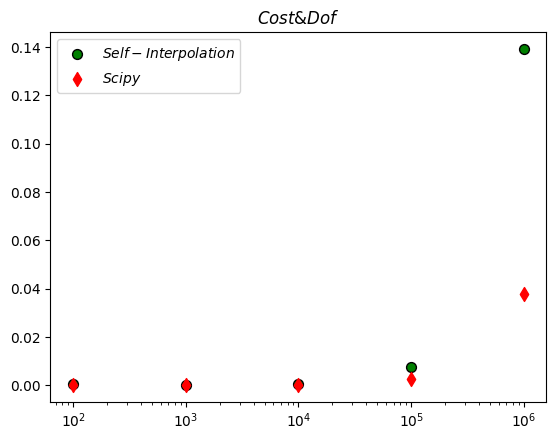

In [49]:
N_new = np.array([100,1000,10000,100000,1000000])
t_sci = np.zeros(len(N_new))
xn = np.array ([-2.0,-1.0,0.,1.,2.])
yn = 0.1*xn**5 + 10*xn**4 + 100*xn**3 + 200*xn + 100
t = np.zeros(len(N_new))
for i in range (len(N_new)):
  start = time.time()
  xq = np.linspace (-2, 2.0, N_new[i])
  tilda_val = f_tilda(xq)
  t_sci[i] = (time.time() - start)
for i in range (len(N_new)):
  start = time.time()
  xq = np.linspace (-2, 2.0, N_new[i])
  Pi = lagInt1D (xq, xn, yn)
  t[i] = (time.time() - start)
print(t_sci)
print(t)
plt.scatter (N_new, t, marker = 'o', s = 50, facecolor = 'green',
               edgecolor = 'black', linewidth = 1,label = r'$Self-Interpolation$',zorder = 1)
plt.scatter (N_new, t_sci, marker = 'd', s = 50, facecolor = 'red',
               edgecolor = 'red', linewidth = 1,label = r'$Scipy$', zorder = 2)
plt.xscale('log')
plt.title('$Cost&Dof$')
plt.legend()
plt.show()




**Write your answer here:**

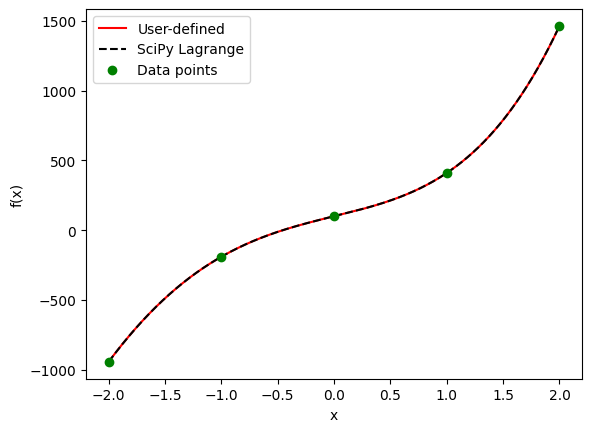

In [50]:
# Plot the functions (do not change here)
plt.figure()
plt.plot(x,P,'r')
plt.plot(x,Psci,'k--')
plt.plot(xn,yn,'go')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['User-defined','SciPy Lagrange','Data points'])
plt.show()


Task 4: Now add noise to the data xn, yn and perform Lagrange interpolation. Then perform least squares fitting with a 5th order polynomial.

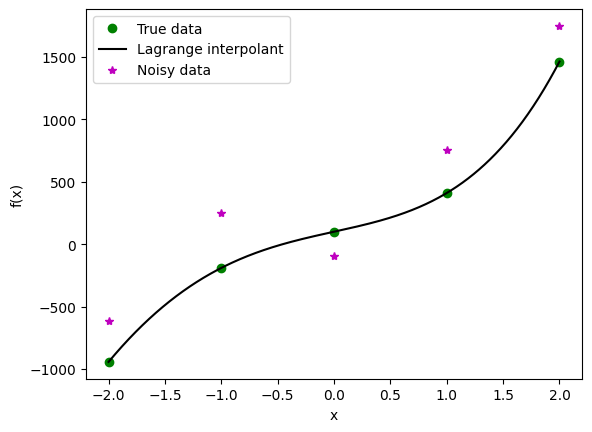

In [51]:
# Noise added to data (do not change)
yn_noisy = yn + 0.4*np.max(yn)*(2*np.random.rand(5) - 1) # Noise is between +- 20% noise added

# Observe the noisy data (do not change)
plt.figure()
plt.plot(xn,yn,'go')
plt.plot(x,Psci,'k')
plt.plot(xn,yn_noisy,'m*')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['True data','Lagrange interpolant','Noisy data'])
plt.show()

Perform the following tasks:

1.   Build a Lagrange interpolant to the noisy data
2.   Fit a 4th order polynomial to the noisy data through least squares



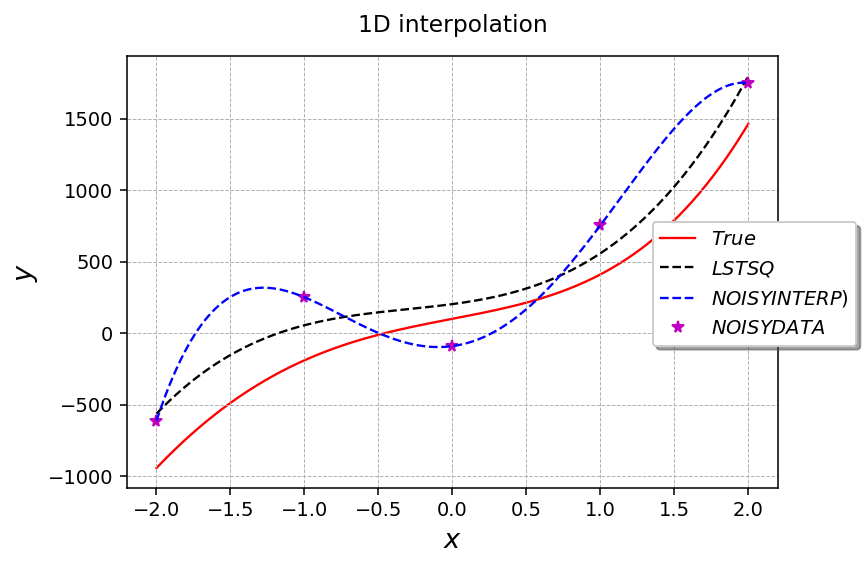

In [61]:
# BUILD A LAGRANGE INTERPOLANT TO NOISY DATA and EVALUATE FUNCTION AT THE SAME x USED ABOVE
Fnoisy = sc.interpolate.lagrange(xn,yn_noisy)
Pnoisy =Fnoisy(x)

# PERFORM LEAST SQUARES (use numpy's least squares)

# Numpy's least squares inputs the matrix B and the vector F to solve Ba = F for the find the coefficients a
# Here B is the so-called Van der Monde matrix and F is the function values
# The Van der Monde matrix can easily be built given the data points
BLST = np.vander(xn,4,increasing=True)
yn_noisy = yn_noisy.reshape(5,1)
aLST_tuple = sc.linalg.lstsq(BLST,yn_noisy)                               # PERFORM LEAST SQUARES FIT - DO NOT CHANGE ANYTHING ELSE
aLST = aLST_tuple[0]
PLST = aLST[0]*x**0 + aLST[1]*x**1 + aLST[2]*x**2 + aLST[3]*x**3

# Compare the Lagrange interpolation and LSTSQ to noisy data and plot the true function

# PLOT TRUE INTERPOLATION as a line plot, NOISY DATA as markers, LAGRANGE INTERPOLATION TO NOISY AND LSTSQ TO NOISY
fig = plt.figure(figsize = (6,4),dpi= 140)
plt.plot(x,P,'r',linewidth = 1.2,label = r'$True$',zorder = 1)
plt.plot(x,PLST,color ="black",linestyle = "dashed",linewidth = 1.2, label = r'$LSTSQ$',zorder = 2)
plt.plot(x,Pnoisy,color ="blue",linestyle = "dashed",linewidth = 1.2, label = r'$NOISYINTERP)$',zorder = 3)
plt.plot(xn, yn_noisy, 'm*',label = r'$NOISYDATA$')

plt.xlabel (r'$x$', fontsize = 14)
plt.ylabel (r'$y$', fontsize = 14)
plt.tick_params (axis = 'x', labelsize = 10)
plt.tick_params (axis = 'y', labelsize = 10)
fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
            handlelength = 1.8, fontsize = 10)
plt.grid (linestyle = 'dashed', linewidth = 0.5)
plt.title ('1D interpolation', fontsize = 12, y = 1.03)
plt.show()



In [62]:
# COMPARE THE ERRORS
# difference between Lagrange interpolation to noisy data and true interpolation
# difference between LSTSQ to noisy data and true interpolation

# PRINT THE ERRORS
lagerror= np.linalg.norm(Psci-Pnoisy)/np.linalg.norm(Psci)
lstsqerror= np.linalg.norm(Psci-PLST)/np.linalg.norm(Psci)
print('L2 Error with Least Squares Fit to Noisy Data: ' + str(lstsqerror))
print('L2 Error with Lagrange Interpolation to Noisy Data:: ' + str(lagerror))

L2 Error with Least Squares Fit to Noisy Data: 0.4211469819730482
L2 Error with Lagrange Interpolation to Noisy Data:: 0.8052479359880796
